# Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


# Importing the dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# checking the data dimension
df.shape

(4177, 9)

In [5]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
# statistical summary
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


we can see there are no missing data in the columns

In [7]:
# checking null values in the dataframe
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

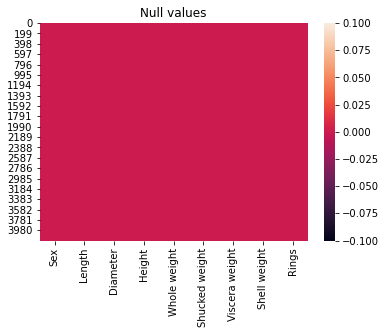

In [8]:
# graphical representation of null values
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

there are no null values in the dataset

In [9]:
#find duplicates
df.duplicated().sum()

0

There are no duplicate values in the dataset


In [10]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

sex column has object data type and therefore require encoding

In [11]:
#count of each sex 
print(df['Sex'].value_counts())

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [12]:
#Encoding all the 3 lables into values of 0,1,& 2 as follows
from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df['Sex'])
pd.Series(df2)
df['Sex']=df2
#i = 0, F=1, M=2

In [13]:
#printing the first 5 rows of the dataset after label encoding
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Target Variable

The Target column = Rings is a continous data and hence this is a Regression problem.


In [14]:
#Checking the datatypes in columns
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [15]:
#count of each value
print(df['Rings'].value_counts())

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64


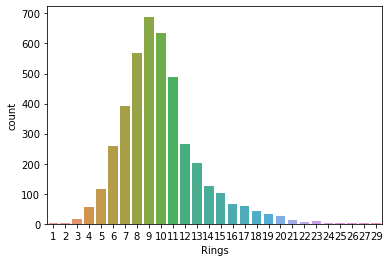

In [16]:
# graphical representation of count of each value
ax = sns.countplot(x="Rings",data=df)

# Checking Correlation

In [17]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

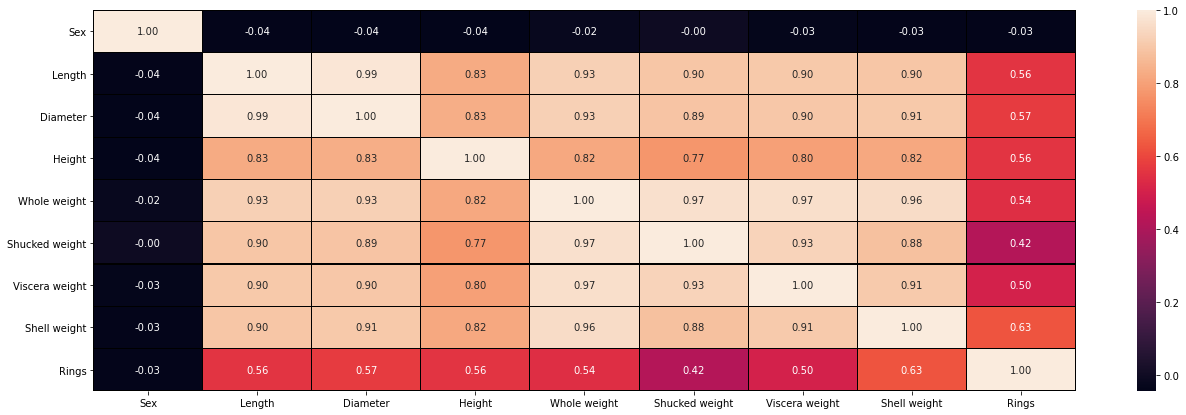

In [18]:
# plotting Heat Map

plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [19]:
corr_matrix = df.corr().abs()
corr_matrix["Rings"].sort_values(ascending=False)


Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex               0.034627
Name: Rings, dtype: float64

# let's check the data distribution among all the columns

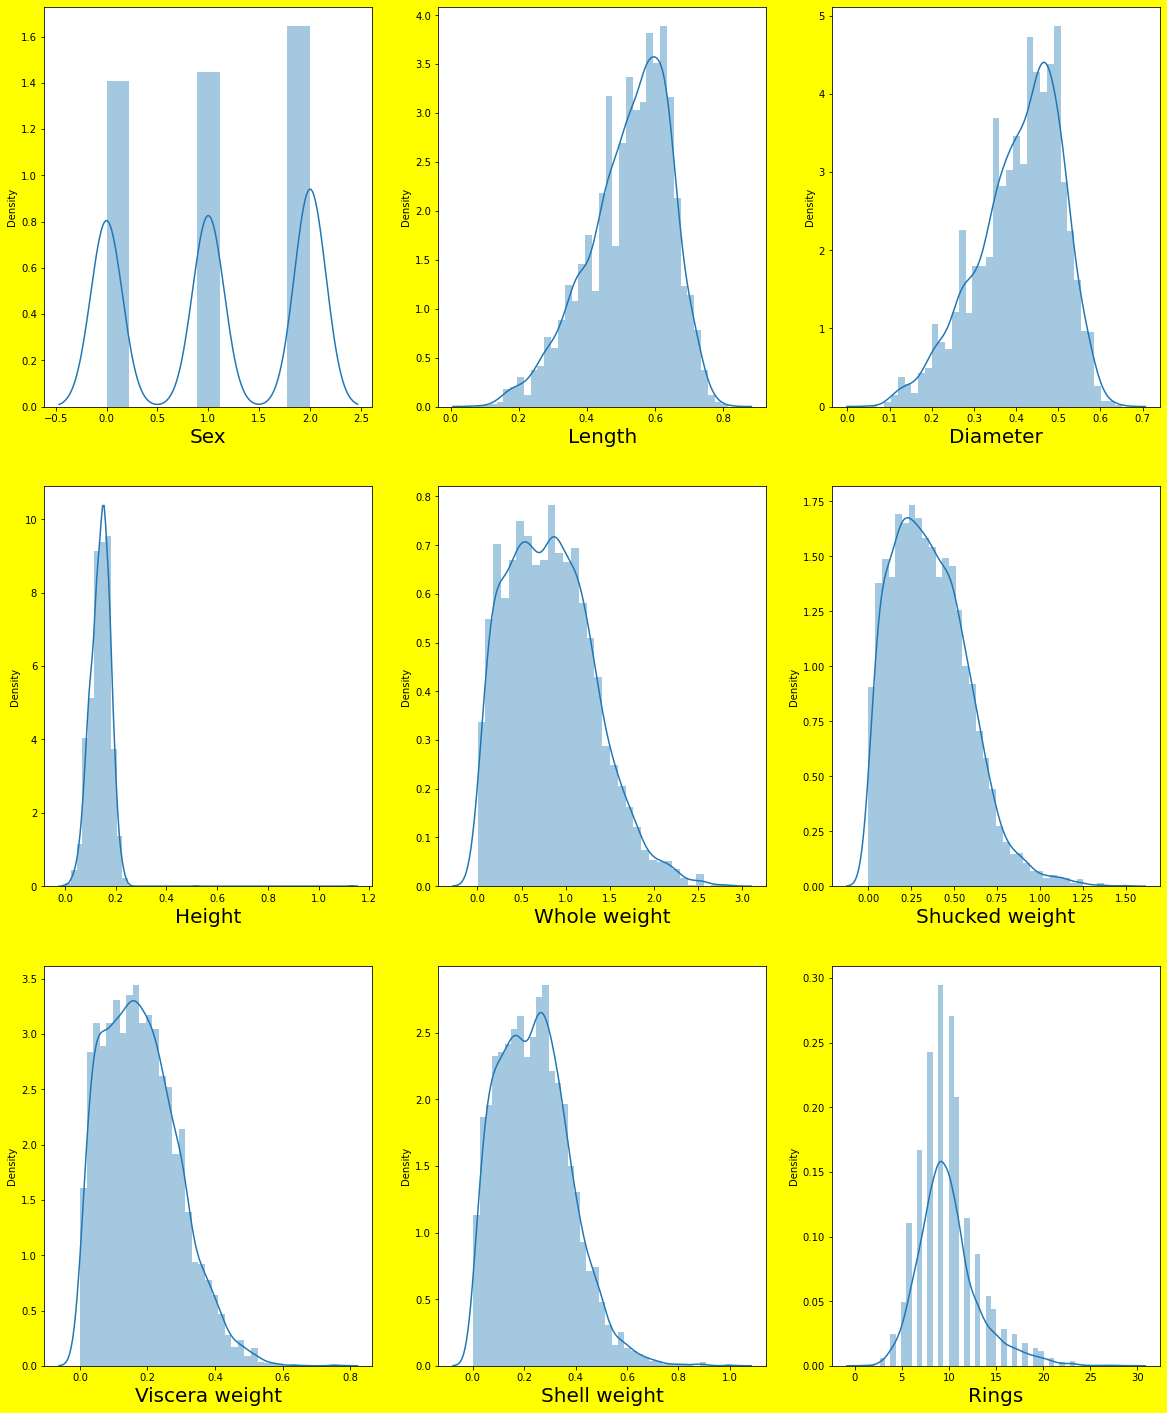

In [20]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber= 1

for column in df:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

We can see skewness in data for multiple columns

# Preprocessing

# Splitting the independent and target variables in x and y before removing the skewness

In [21]:
x = df.drop("Rings",axis=1)
y = df["Rings"]

In [22]:
x.shape

(4177, 8)

In [23]:
y.shape

(4177,)

# Checking Skewness

In [24]:
# checking skewness
x.skew().sort_values(ascending=False)

Height            3.128817
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Sex              -0.098155
Diameter         -0.609198
Length           -0.639873
dtype: float64

We can see skewness in some of the columns of our dataset, we will remove the skewness using power_transform function

In [25]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [26]:
x_new

array([[ 1.12707158, -0.68550213, -0.54986033, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [ 1.12707158, -1.39634403, -1.38733299, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [-1.30793479, -0.07077438,  0.00853714, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [ 1.12707158,  0.59336612,  0.64519089, ...,  0.83813658,
         1.01560749,  0.59839786],
       [-1.30793479,  0.85337516,  0.76992788, ...,  0.85873857,
         0.81518436,  0.51914542],
       [ 1.12707158,  1.83447784,  1.72628889, ...,  2.10364827,
         1.61134422,  1.65848824]])

In [27]:
# checking skewness
pd.DataFrame(x_new, columns= x.columns).skew().sort_values(ascending=False)

Viscera weight    0.039780
Shucked weight    0.027351
Shell weight      0.023390
Whole weight     -0.003980
Diameter         -0.065977
Length           -0.066669
Height           -0.115483
Sex              -0.176442
dtype: float64

In [28]:
x = pd.DataFrame(x_new, columns= x.columns)
x.skew().sort_values(ascending=False) # validating that skewness has been removed or not

Viscera weight    0.039780
Shucked weight    0.027351
Shell weight      0.023390
Whole weight     -0.003980
Diameter         -0.065977
Length           -0.066669
Height           -0.115483
Sex              -0.176442
dtype: float64

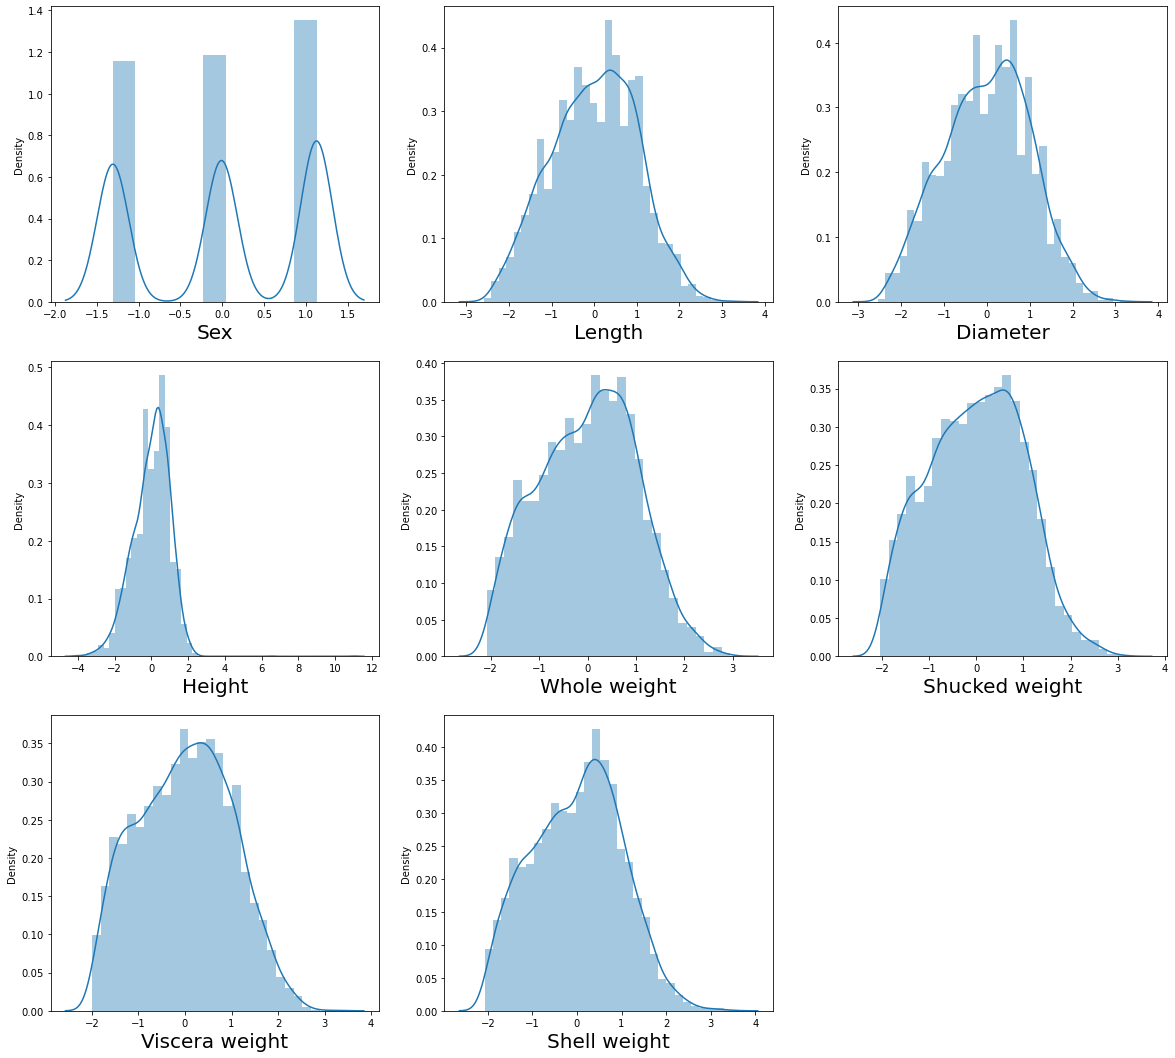

In [29]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax= plt.subplot(4,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

Skewness has been removed, now we can proceed with further steps.

In [30]:
  x.shape

(4177, 8)

In [31]:
y.shape

(4177,)

# Checking Outliers

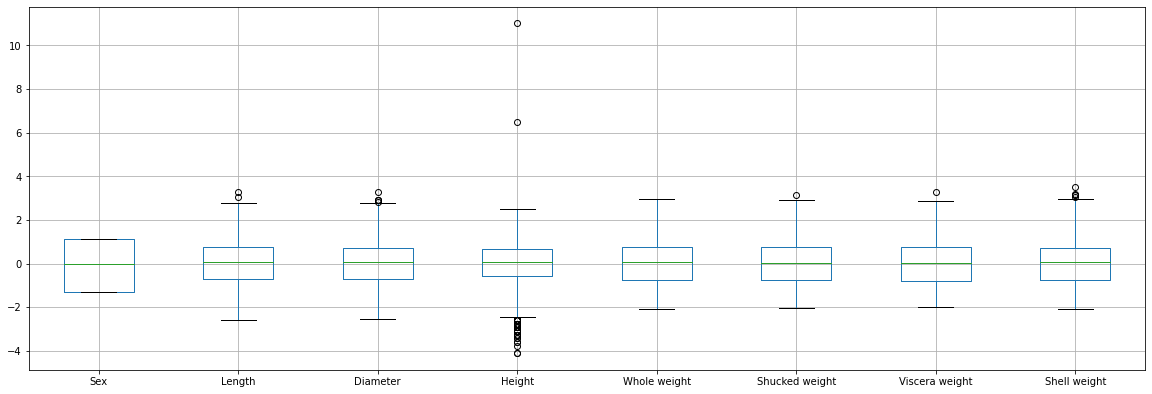

In [32]:
# visualize the outliers using box plot
x.boxplot(figsize=[20,8]) 
plt.subplots_adjust(bottom=0.25)
plt.show()

In [33]:
# to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

threshold=3
print(np.where(z>3))

x_new=x[(z<3).all(axis=1)]
print("total_dropped_rows",x.shape[0]-x_new.shape[0])

y=y[(z<3).all(axis=1)]
y.shape

(array([ 163,  166,  236,  237,  238,  306,  694,  719,  720,  891, 1174,
       1209, 1257, 1417, 1428, 1428, 1763, 1987, 2051, 2108, 2161, 2169,
       2171, 2172, 2334, 2381, 2711, 3190, 3902, 3996], dtype=int64), array([7, 7, 3, 3, 3, 3, 3, 3, 3, 7, 3, 5, 3, 3, 1, 2, 6, 3, 3, 7, 7, 3,
       3, 3, 1, 3, 3, 3, 3, 3], dtype=int64))
total_dropped_rows 29


(4148,)

In [34]:
x = x_new

In [35]:
x.shape

(4148, 8)

In [36]:
y.shape

(4148,)

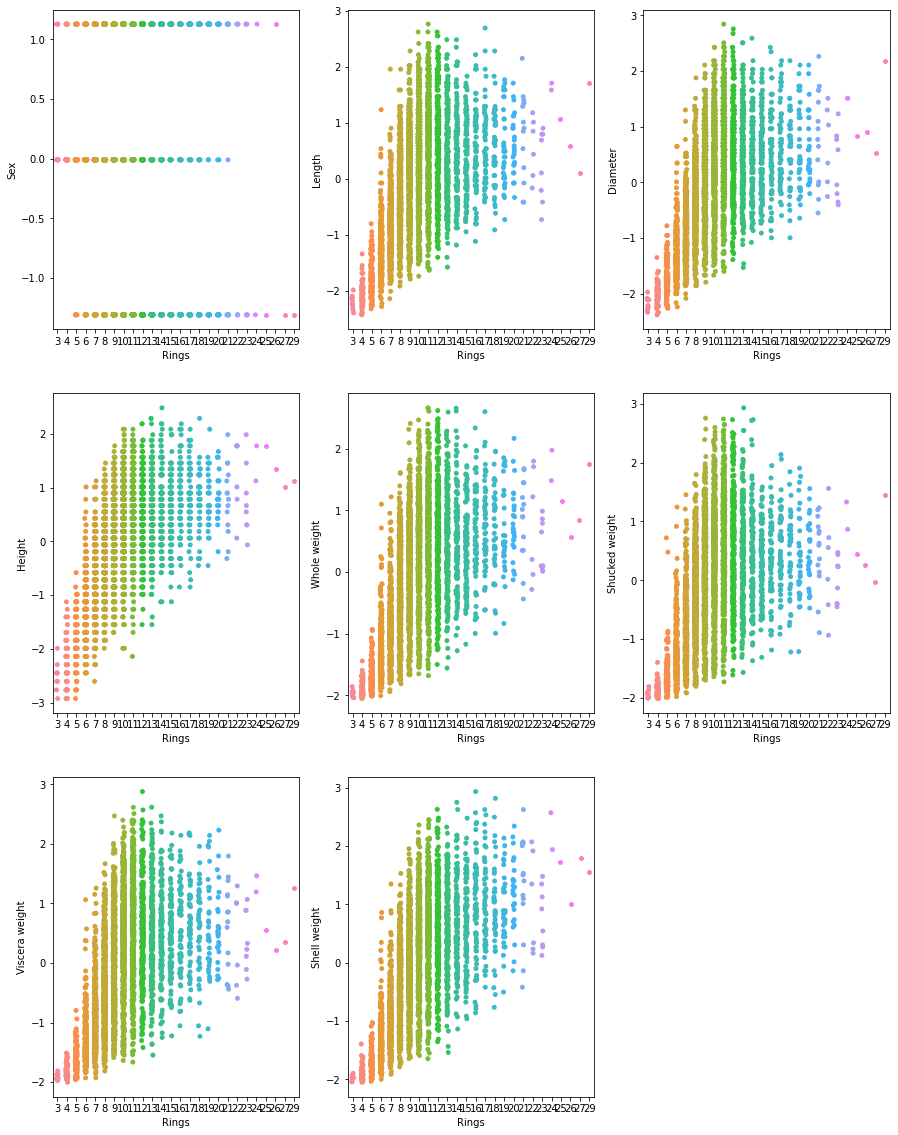

In [39]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(15,20))
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column]) 
    plotnumber+=1
plt.show()

Great! let's proceed by checking multicollinearilty(refer nb notes) in the dependent variables. Before that we should scale our data, let's use the standard scaler for that

multicollinearity:

In [44]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

now we will check for multicollinearity using VIF

In [45]:
x_scaled.shape[1]

8

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns

#let's check the values
vif

,vif,features
0,1.013000,Sex
1,36.176677,Length
2,34.844985,Diameter
3,7.000442,Height
4,142.024620,Whole weight
5,37.246139,Shucked weight
6,22.616913,Viscera weight
7,31.278008,Shell weight


# Training process begins

Finding best random state

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

Best random state

In [52]:
#Finding best random_state
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    y_pred_train=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,y_pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,y_pred)}")
    print("\n")

At random state 0,the training accuracy is:- 0.5397473337364487
At random state 0,the testing accuracy is:- 0.5440645857615658


At random state 1,the training accuracy is:- 0.5402886921417355
At random state 1,the testing accuracy is:- 0.5403354384809604


At random state 2,the training accuracy is:- 0.5442378293621564
At random state 2,the testing accuracy is:- 0.5245836986598839


At random state 3,the training accuracy is:- 0.5404097390187457
At random state 3,the testing accuracy is:- 0.540925285041104


At random state 4,the training accuracy is:- 0.5427688260957224
At random state 4,the testing accuracy is:- 0.5296917103506518


At random state 5,the training accuracy is:- 0.5366094372324012
At random state 5,the testing accuracy is:- 0.5553217896047631


At random state 6,the training accuracy is:- 0.5437089015008001
At random state 6,the testing accuracy is:- 0.5258198018708344


At random state 7,the training accuracy is:- 0.5527422294881716
At random state 7,the testing accu

# Creating train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=10)

In [54]:
x_train.shape

(3318, 8)

In [55]:
y_train.shape

(3318,)

In [56]:
x_test.shape

(830, 8)

In [57]:
y_test.shape

(830,)

# Linear Regression

In [58]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

54.59858536892048


# Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print("Score", r2_score(y_test,y_pred_dt)*100)

Score 14.963179158018924


# Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score", r2_score(y_test,y_pred_rf)*100)

Score 54.447220493949814


# SVR

In [62]:
from sklearn.svm import SVR

svc = SVR()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
print("Score", r2_score(y_test,y_pred_svc)*100)

Score 53.56035639732482


# Cross Validation

In [82]:
Train_accuracy=r2_score(y_train,y_pred_train)
Test_accuracy=r2_score(y_test,y_pred)

from sklearn.model_selection import cross_val_score

#validation accuracy
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=5)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} cv score is {cv_mean} accuracy score for training is {Train_accuracy*100} accuracy for testing is {Test_accuracy*100}")
print("\n")

At cross fold 2 cv score is 0.42968609260874785 accuracy score for training is -56.3664244341888 accuracy for testing is 55.02738820709434
At cross fold 3 cv score is 0.42968609260874785 accuracy score for training is -56.3664244341888 accuracy for testing is 55.02738820709434
At cross fold 4 cv score is 0.42968609260874785 accuracy score for training is -56.3664244341888 accuracy for testing is 55.02738820709434
At cross fold 5 cv score is 0.42968609260874785 accuracy score for training is -56.3664244341888 accuracy for testing is 55.02738820709434
At cross fold 6 cv score is 0.42968609260874785 accuracy score for training is -56.3664244341888 accuracy for testing is 55.02738820709434
At cross fold 7 cv score is 0.42968609260874785 accuracy score for training is -56.3664244341888 accuracy for testing is 55.02738820709434
At cross fold 8 cv score is 0.42968609260874785 accuracy score for training is -56.3664244341888 accuracy for testing is 55.02738820709434
At cross fold 9 cv score is

Since the number of folds don't have such impact on the  accuracy and the cv_score, so cv=5 is selected

Here, we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

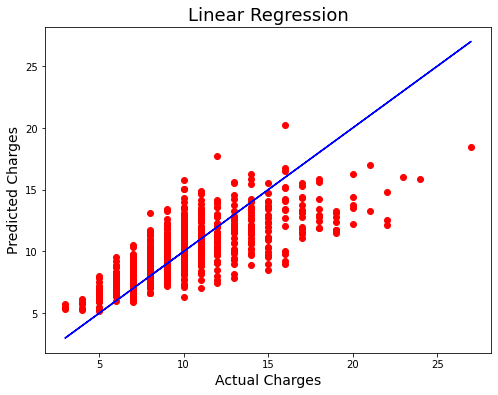

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [72]:
#Best fit line is covering most of the datapoints which shows good fit of our model


In [73]:
#REGULARIZATION
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [74]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001, .001, .01, .1, 1, 2, 4, 6, 8, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [76]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss
cv_score=cross_val_score(ls,x_scaled,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

42.93149513170603

# Ensemble technique

In [78]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'], 'max_features':["auto","sqrt","log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [79]:
rf = RandomForestRegressor(criterion="mae",max_features="log2")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9311141352823068

In [81]:
y_pred=rf.predict(x_test)
rfs = r2_score(y_test,y_pred)
print("r2_score:",rfs*100)
rfscore = cross_val_score(rf,x_scaled,y,cv=5)
rfc=rfscore.mean()
print("Cross val score:",rfc*100)

r2_score: 55.02738820709434
Cross val score: 44.34998334691579


# Saving the model

In [ ]:
#PICKELING OF A FILE OR SERIALIZATION OF A FILE
import joblib
filename = 'abalone.pickle'
pickle.dump(rf, open(filename, 'wb')